# HW 2

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 3.1.12

### Step 1

In [6]:
def generate_c_matrix(n):
    global N
    c = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            c[i-1][j-1] = 0.1*N*i*j
    return c

def generate_a_matrix(c_matrix,n):
    a = c_matrix.copy()
    for i in range(n):
        for j in range(n):
            a[i][j] = 111/c_matrix[i][j]**4 + 3*c_matrix[i][j] + 13
    return np.array(a)

def generate_b_array(n):
    return np.array([i+1 for i in range(n)])

In [7]:
N = 12 
n = 4

c = generate_c_matrix(n)
A = generate_a_matrix(c,n)
b = generate_b_array(n)



# Нахождение решения x системы Ax=b с помощью метода Гаусса
x_correct = np.array(np.linalg.solve(A, b))
print("Решение x системы Ax=b:", x_correct)

Решение x системы Ax=b: [-0.00413223  0.15236168 -0.57010445  0.421875  ]


### Step 2

In [8]:
cond_number = np.linalg.cond(A)
print("Число обусловленности матрицы A равно:", cond_number)


Число обусловленности матрицы A равно: 5.300895773034461e+16


### Step 3

In [9]:
def create_B_list(n,b,delta = 0.001):
    B = []
    for i in range(n):
        b_i = []
        for k in range(n):
            b_i.append(b[k]+delta if i == k else b[k])
        B.append(b_i)
    return np.array(B) 

def calculate_d_comp(pred,real):
    return max(abs(pred - real)) / max(real)



In [10]:
x = []
B = create_B_list(n,b)
d = []
for i in range(n):
    sol = np.linalg.solve(A, B[i])
    x.append(sol)
    d.append(calculate_d_comp(sol,x_correct))


### Step 4

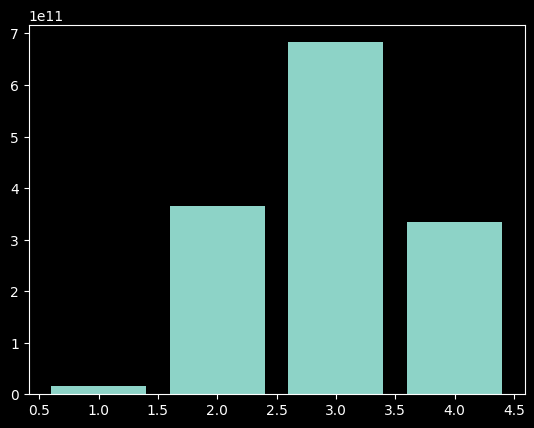

In [11]:
with plt.style.context("dark_background"):
    plt.bar(x =range(1,n+1), height=d);


### Step 5 is presented in second task

## 3.2

In [57]:
def add_noise_to_matrix(A, delta = 0.001):
    x,y = A.shape
    
    return A + np.array(np.random.uniform(-delta/2,delta/2,x*y)).reshape(x,y)

In [58]:
def sigma(pred,real):
    return np.linalg.norm(pred - real) / np.linalg.norm(pred)

def calculate_d_comp(pred,real):
    return max(abs(pred - real)) / max(real)

In [60]:
EXP_NUM = 100
c = generate_c_matrix(n)
A = generate_a_matrix(c,n)
b = generate_b_array(n)
x_correct = np.linalg.solve(A, b)

d_vec = []
s_x_vec = []
s_a_vec = []

cond_number = np.linalg.cond(A)


for exp_num in range(EXP_NUM):
    A_cur = add_noise_to_matrix(A)
    sol = np.linalg.solve(A_cur, b)
    d_vec.append(calculate_d_comp(sol,x_correct))
    s_x_vec.append(sigma(sol,x_correct))
    s_a_vec.append(sigma(A_cur,A))

s_x_vec = np.array(s_x_vec)
s_a_vec = np.array(s_a_vec)

# with plt.style.context("dark_background"):
#     plt.hist(np.log(d_vec),bins=30);
plt.hist(d_vec,bins=50);

In [61]:
Err

array([[0.4265032 , 0.67575015, 1.3513587 , 2.04701087],
       [0.4265032 , 0.67575015, 1.3513587 , 2.04701087],
       [0.4265032 , 0.67575015, 1.3513587 , 2.04701087],
       [0.4265032 , 0.67575015, 1.3513587 , 2.04701087]])

In [52]:
if False in s_x_vec <= cond_number*s_a_vec : print("Formula is wrong")
else: print("Formula is correct")

Formula is correct


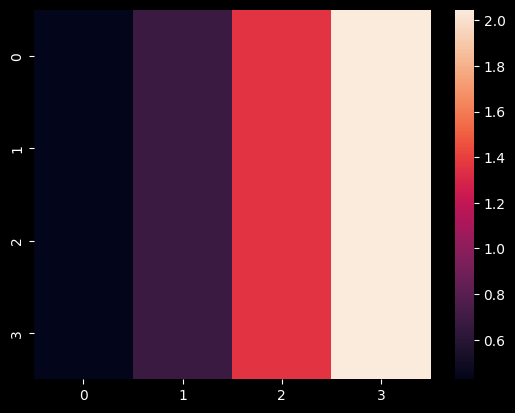

In [56]:
with plt.style.context("dark_background"):
    sns.heatmap(Err)
plt.show()

## Task 3.5.3

In [181]:
def cholesky(A, n = 30, m = 9):
    n = len(A)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(min(i+1,n)):
            if i == j:
                temp = A[i][i] - sum(L[i][k]**2 for k in range(i))
                L[i][i] = np.sqrt(temp)
            else:
                temp = A[i][j] - sum(L[i][k]*L[j][k] for k in range(j))
                L[i][j] = temp / L[j][j]
    return L

def solve_cholesky(A, b, n = 30, m = 9):
    L = cholesky(A)
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(L.T, y)
    return (y,x)

def generate_a_matrix_3_5_3(n = 30,m = 9):

    a = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            a[i-1][j-1] = (i+j)/(m+n) if i != j else n + m**2 + j/m + i/n 
    return np.array(a)

def generate_b_vec_3_5_3(n = 30):
    return np.array([i**2 - 100 for i in range(1,n+1)]).T


In [182]:
n = 30
m = 9

A = generate_a_matrix_3_5_3()
b = generate_b_vec_3_5_3()

ans = solve_cholesky(A, b)
print("Решение системы уравнений методом Холецкого:")

ans


Решение системы уравнений методом Холецкого:


(array([-9.39055617, -9.09358969, -8.60141902, -7.91509934, -7.03599474,
        -5.9657682 , -4.70636938, -3.26002049, -1.62920036,  0.1833731 ,
         2.17476172,  4.34182706,  6.68125131,  9.18955876, 11.86313777,
        14.69826282, 17.69111659, 20.83781175, 24.13441235, 27.57695449,
        31.16146633, 34.88398711, 38.74058516, 42.72737481, 46.84053203,
        51.07630893, 55.43104685, 59.90118823, 64.48328714, 69.17401852]),
 array([-1.19421606, -1.17628984, -1.14042087, -1.08665417, -1.01503464,
        -0.92560698, -0.81841578, -0.69350547, -0.55092032, -0.39070448,
        -0.21290192, -0.01755648,  0.19528813,  0.42558837,  0.67330083,
         0.93838226,  1.22078953,  1.52047967,  1.83740985,  2.17153737,
         2.52281968,  2.89121438,  3.27667918,  3.67917196,  4.09865073,
         4.53507363,  4.98839893,  5.45858506,  5.94559058,  6.44937417]))